# **Assignment 4**
# Srujana Vanka - 2020102005

In [8]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import random
import sortedcontainers
import copy
import time
import sys
sys.setrecursionlimit(100000) 

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/DIP/images4/imgs
%ls

/content/drive/MyDrive/DIP/images4/imgs
circles.jpg  dd.png  download.jpeg  pepper.jpg  pictionary.png  shapes.png


# Question 1 - Ambitious Jo

In [ ]:
def read_this(image_file):
    image_src = cv2.imread(image_file, 0)
    return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b
    
def Erode(image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    image_eroded = cv2.erode(src=image_src, kernel=np.ones((erosion_level, erosion_level)), iterations=1)


    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)
    return image_eroded

In [ ]:
def redefine(imgP, pad, img):
    r=imgP.shape[0]
    c=imgP.shape[1]
    x0 = pad
    x1 = r-pad
    y0 = pad
    y1 = c-pad
    imgP[x0:x1, y0:y1] = img
    return imgP

def padding(img,kernel_size):
    k=kernel_size
    pad = math.floor(k/2)
    h=img.shape[0]
    w=img.shape[1]
    imgP = np.zeros((h+(2*pad),w+(2*pad)))
    r=imgP.shape[0]
    c=imgP.shape[1]
    imgP[pad:r-pad, pad:c-pad] = img
    im = redefine(imgP,pad,img)
    return im

In [ ]:
def read_this(image_file):
    image_src = cv2.imread(image_file, 0)
    return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b
    
def Dilate(image_file, dilation_level=3, with_plot=False):
    # setting the dilation_level
    dilation_level = 3 if dilation_level < 3 else dilation_level
    
    # obtain the kernel by the shape of (dilation_level, dilation_level)
    structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    image_dilated = cv2.dilate(src=image_src, kernel=np.ones((dilation_level, dilation_level)), iterations=1)
    
    orig_shape = image_src.shape
    pad_width = dilation_level - 2
    
    # pad the image with pad_width
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
    
    # obtain the submatrices according to the size of the kernel
    flat_submatrices = np.array([
        image_pad[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])
    
    # replace the values either 255 or 0 by dilation condition
    image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
    # obtain new matrix whose shape is equal to the original image size
    image_dilate = image_dilate.reshape(orig_shape)
    return image_dilated

### Answer key

In [ ]:
im = cv2.imread("answerKey.jpg")
key = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

y_coords = [813,     
860,
898,
942,
981,
1024,
1069,
1110,
1152,
1198,
1238,
1281,
1323,
1366,
1407]

x_coords = [238,
279,
321,
361,
570,
613,
653,
696,
907,
950,
993,
1034]

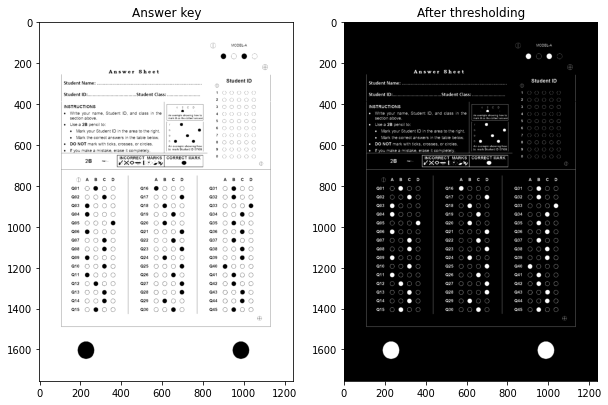

In [ ]:
omr = cv2.imread("sampleStudentOMRSheet.png")
omr = cv2.cvtColor(omr, cv2.COLOR_BGR2GRAY)

t1 = 190
t2 = 92
val = 255
thresholded = np.zeros(omr.shape)
for i in range(omr.shape[0]):
        for j in range(omr.shape[1]):
            if(omr[i][j]<=t1):
                # change to black
                thresholded[i][j] = 0 
            else:
                # change to white
                thresholded[i][j] = val 
invert = np.zeros(thresholded.shape)
for i in range(thresholded.shape[0]):
        for j in range(thresholded.shape[1]):
            if thresholded[i][j] != val:
                invert[i][j] = val
            else:
                invert[i][j] = 0
omr = invert

thres = np.zeros(key.shape)
for i in range(key.shape[0]):
        for j in range(key.shape[1]):
            if(key[i][j]<=t2):
                # change to black
                thres[i][j] = 0 
            else:
                # change to white
                thres[i][j] = val
key = thres
inv = np.zeros(thres.shape)
for i in range(thres.shape[0]):
        for j in range(thres.shape[1]):
            if thres[i][j] != val:
                inv[i][j] = val
            else:
                inv[i][j] = 0
key_1 = inv

# PLotting
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(key,cmap="gray")
plt.title("Answer key")
plt.subplot(122)
plt.imshow(key_1,cmap="gray")
plt.title("After thresholding")
plt.show()

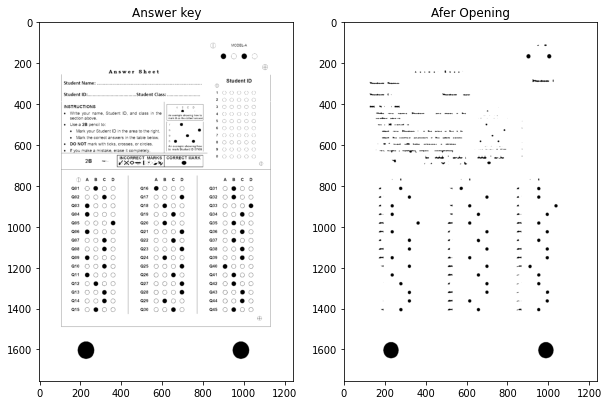

In [ ]:
# Erosion followed by Dilation
omr_next = cv2.erode(omr, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)), iterations = 1)
omr_next = cv2.dilate(omr_next, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)), iterations = 1)
key_next = cv2.erode(key, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)), iterations = 1)
key_next = cv2.dilate(key_next, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13)), iterations = 1)

# PLotting
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(key, cmap="gray")
plt.title("Answer key")
plt.subplot(122)
plt.imshow(key_next, cmap="gray")
plt.title("Afer Opening")
plt.show()

# Question 2 - Creed’s Side Gig

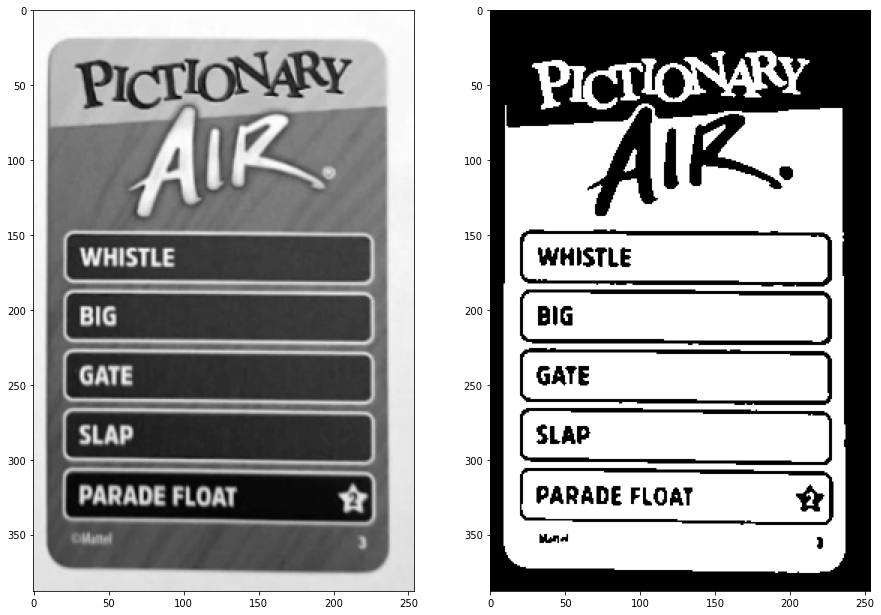

In [ ]:
im = cv2.imread("pictionary.png",0)
threshold = 165
i = (im < threshold).astype(np.uint8)
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(i,cmap='gray')
plt.show()

In [ ]:
def read_this(image_file):
    image_src = cv2.imread(image_file, 0)
    return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b
    
def Dilate(image_file, dilation_level=3, with_plot=False):
    # setting the dilation_level
    dilation_level = 3 if dilation_level < 3 else dilation_level
    
    # obtain the kernel by the shape of (dilation_level, dilation_level)
    structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    image_dilated = cv2.dilate(src=image_src, kernel=np.ones((dilation_level, dilation_level)), iterations=1)
    
    orig_shape = image_src.shape
    pad_width = dilation_level - 2
    
    # pad the image with pad_width
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
    
    # obtain the submatrices according to the size of the kernel
    flat_submatrices = np.array([
        image_pad[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])
    
    # replace the values either 255 or 0 by dilation condition
    image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
    # obtain new matrix whose shape is equal to the original image size
    image_dilate = image_dilate.reshape(orig_shape)
    return image_dilated

In [ ]:
def read_this(image_file):
    image_src = cv2.imread(image_file, 0)
    return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b
    
def Erode(image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    image_eroded = cv2.erode(src=image_src, kernel=np.ones((erosion_level, erosion_level)), iterations=1)


    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)
    return image_eroded

In [ ]:
def combine(a, link):
    if link[a] == a+0:
        return a
    else:
        link[a] = combine(link[a], link)
        return link[a]

def addComp(n,a,b):
    n.append((a, b))
    return n

def connComponents4(im):
    next = 1 # next label
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h = im.shape[0]
    w = im.shape[1]
    for r in range(h):
        for c in range(w):
            if im[r, c] != 0:
                neighbors = []
                if r > 0:
                    if im[r-1][c] == im[r, c]:
                        neighbors = addComp(neighbors, r-1,c)
                if c > 0:
                    if (im[r, c-1] == im[r, c]):
                        neighbors = addComp(neighbors, r,c-1)
                if r > 0 and c + 1 < w:
                    if im[r-1, c+1] == im[r, c]:
                        neighbors = addComp(neighbors, r-1,c+1)
                if r > 0 and c > 0:
                    if im[r-1, c-1] == im[r, c]:
                        neighbors = addComp(neighbors, r-1,c-1)

                num_n = len(neighbors)
                if num_n == 0:
                    linked.append(next)
                    labels[r, c] = next
                    next = 1 + next
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[r, c] = min(L)
                    for label in L:
                        linked[combine(label, linked)] = combine(labels[r, c], linked)
                        
    for r in range(h):
        for c in range(w):
            if im[r, c] != 0:
                labels[r, c] = combine(labels[r, c], linked)
    return labels


Text(0.5, 1.0, 'Output image')

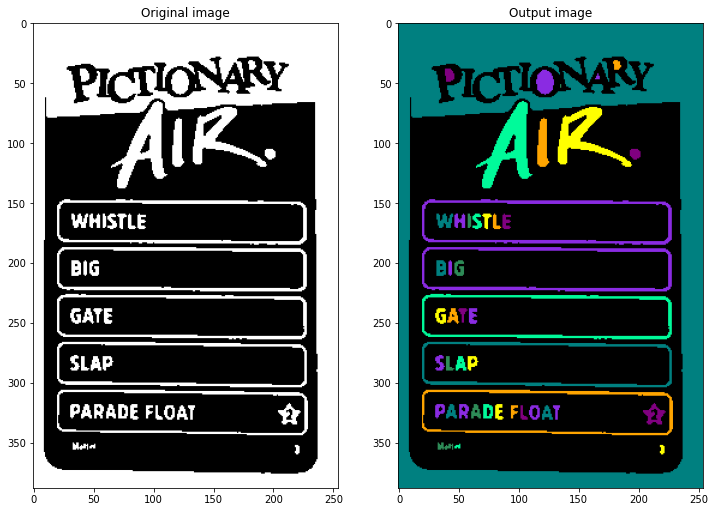

In [ ]:
img = cv2.imread("pictionary.png", cv2.IMREAD_GRAYSCALE)
img = (img >threshold).astype(np.uint8)
img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)), iterations = 3)
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)), iterations = 3)

def components(img):
    COLORS = [(0,250,154), (255, 255, 0), (255,165,0), (128, 0, 128), (138,43,226), (0,128,128), (138,43,226), (46,139,87), (255,20,147)]
    r = img.shape[0]
    t = img.shape[1]
    channels = 3
    output = np.zeros((r, t, channels))
    num_bits=8
    conn = connComponents4(img)
    keys = np.unique(conn)
    numkeys = len(keys)
    vals = list(range(1,numkeys + 1))
    n = len(vals)
    dic = dict(zip(keys, vals))
    for c in range(n):
        for i in range(r):
            for j in range(t):
                if conn[i][j] != 0:
                    c = dic[conn[i][j]]
                    temp = c % num_bits
                    output[i][j][0] = COLORS[temp][0]
                    output[i][j][1] = COLORS[temp][1]
                    output[i][j][2] = COLORS[temp][2]
    output = output.astype(np.uint8)
    return output

output = components(img)

#Plotting
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(output)
plt.title('Output image')

# Question 3 - Color Operations


## 3.1

In [ ]:
def redefine(imgP, pad, img):
    r=imgP.shape[0]
    c=imgP.shape[1]
    x0 = pad
    x1 = r-pad
    y0 = pad
    y1 = c-pad
    imgP[x0:x1, y0:y1] = img
    return imgP

def padding(img,kernel_size):
    k=kernel_size
    pad = math.floor(k/2)
    h=img.shape[0]
    w=img.shape[1]
    imgP = np.zeros((h+(2*pad),w+(2*pad)))
    r=imgP.shape[0]
    c=imgP.shape[1]
    imgP[pad:r-pad, pad:c-pad] = img
    im = redefine(imgP,pad,img)
    return im

In [ ]:
def rgbIm(img):
    img_b = img[:,:,0].astype('uint8')
    img_g = img[:,:,1].astype('uint8')
    img_r = img[:,:,2].astype('uint8')
    return img_b, img_g, img_r

def medFilt(img, k):
    img_b, img_g, img_r = rgbIm(img)
    res = np.zeros(img.shape)
    channels = 3
    for q in range(channels):
        imgP = img
        preCompRow = sortedcontainers.SortedList()
        preCompCol = sortedcontainers.SortedList()
        padNum = k//2
        r0 = imgP.shape[0]
        c0 = imgP.shape[1]
        xStart = padNum
        xEnd = r0 - padNum
        yStart = padNum
        yEnd = c0 - padNum
        out = np.copy(imgP)
        for i in range(xStart,xEnd):
            #Standard
            if i==xStart:
                for l in range(k):
                    for m in range(k):
                        preCompRow.add(imgP[k,m])
            else:
                #Remove upper most rows and iterate through columns
                for l in imgP[i-(padNum+i),1:k]:
                    preCompRow.discard(l)
                #Add the next lower row
                for l in imgP[i+padNum,1:k]:
                    preCompRow.add(k)

            for j in range(yStart,yEnd):
                if(j!=padNum):
                    for l in imgP[i-padNum:i+padNum-1,j-padNum+1]:
                        preCompCol.discard(l)
                    for l in imgP[i-padNum:i+padNum-1,j+padNum]:
                        preCompCol.add(l)
                else:
                    preCompCol = copy.deepcopy(preCompRow)
                val = ((k**2)/2)
                out[i][j] = preCompCol[val]
        out = out[xStart:xEnd, yStart:yEnd]

    res = res.astype('uint8')
    return res

Text(0.5, 1.0, 'Filtered Image')

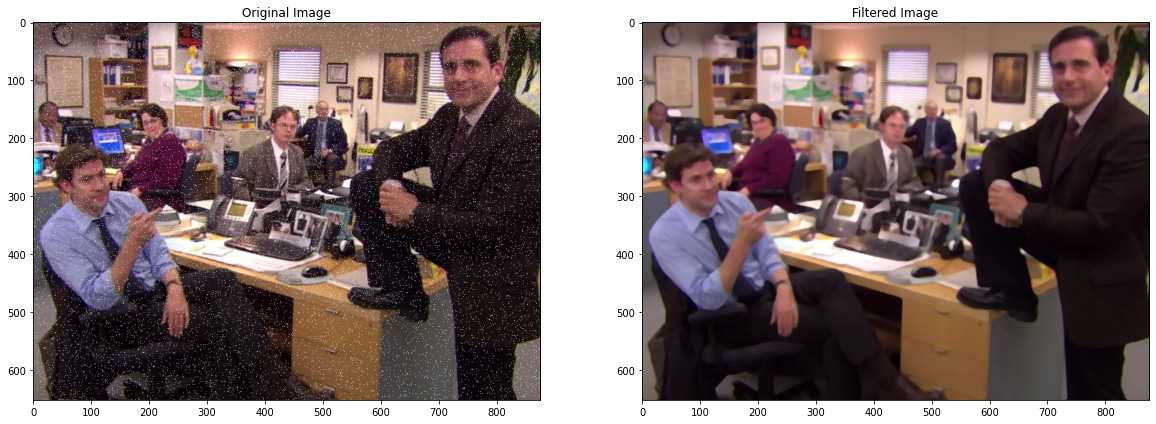

In [ ]:
# Reading the image
img = cv2.imread("salt.png")
imgR = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out = medFilt(img,7)

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgR)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out)
plt.title("Filtered Image")

## 3.2

In [ ]:
# 3.2
def LinContrastStretching(img,consta,constb):
    a=consta
    b=constb
    result = np.zeros(img.shape)
    channels = 3
    
    for i in range(channels):
        var = np.copy(img[:,:,i].astype('uint8'))
        Max = np.amax(var, axis=None)
        Min = np.amin(var, axis=None)
        temp = (var - Min)/(Max - Min)
        diff = (b-a)
        imgContrast = np.round(((temp*diff) + a),decimals=0)
        imgContrast = imgContrast.astype(np.uint8)
        result[:,:,2-i] = imgContrast.astype('uint8')
        im = result.astype('uint8')
    return im

Text(0.5, 1.0, 'Contrast stretching')

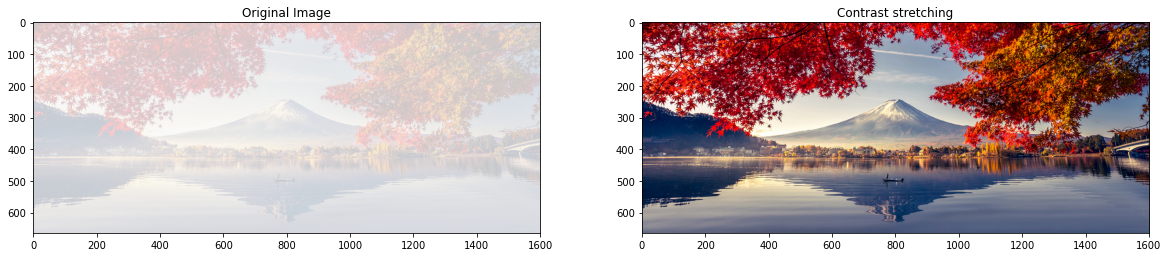

In [ ]:
# Reading the image
img = cv2.imread("landscape.png")
imgR = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

out = LinContrastStretching(img,0,255)

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgR)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out)
plt.title("Contrast stretching")

## 3.3

In [ ]:
# 3.3
def histEqualization(img):
    result = np.zeros(img.shape)
    channels = 3
    for j in range(channels):
        temp = img[:,:,j].astype('uint8')
        hist = np.zeros((256,), dtype=int)
        n = np.ravel(temp)
        for i in (n):
            hist[i] += 1
        Total = np.sum(hist)

        # CDF
        for i in range(255):
            m = i+1
            hist[m] += hist[i]
        histMin = hist.min()
        histIm = (((hist - histMin)*255)/(Total - histMin))
        histIm = histIm.astype('uint8')
        h = temp.shape[0]
        w= temp.shape[1]
        for r in range(h):
            for c in range(w):
                temp[r][c] = histIm[temp[r][c]]
        k = 2-j
        result[:,:,k] = temp.astype('uint8')
        im = result.astype('uint8')
    return im

Text(0.5, 1.0, 'Histogram Equalization')

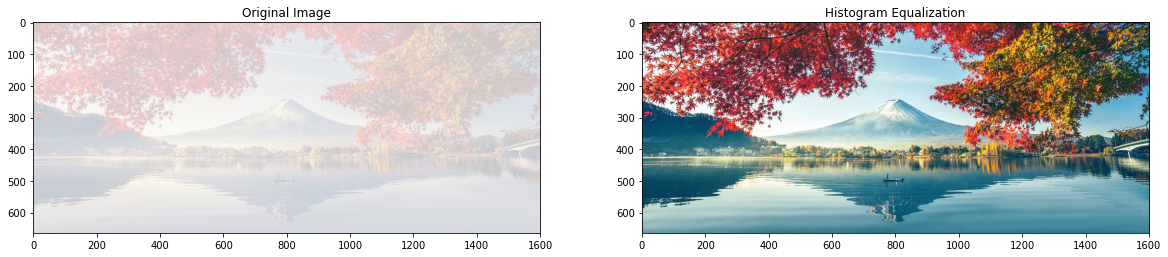

In [ ]:
# Reading the image
img = cv2.imread("landscape.png")
imgR = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

out = histEqualization(img)

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgR)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out)
plt.title("Histogram Equalization")

## 3.4

### **Vintage Effect**

In [ ]:
# 3.4
img = cv2.imread("office.jpg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgB = img[:,:,0].astype('double')
imgG = img[:,:,1].astype('double')
imgR = img[:,:,2].astype('double')

#Vintage Effect
vinR = (imgR * 0.293) + (imgG *0.769) + (imgB * 0.210);
vinG = (imgR * 0.249) + (imgG *0.686) + (imgB * 0.188);
vinB = (imgR * 0.172) + (imgG *0.534) + (imgB * 0.151);

Text(0.5, 1.0, 'Vintage Effect')

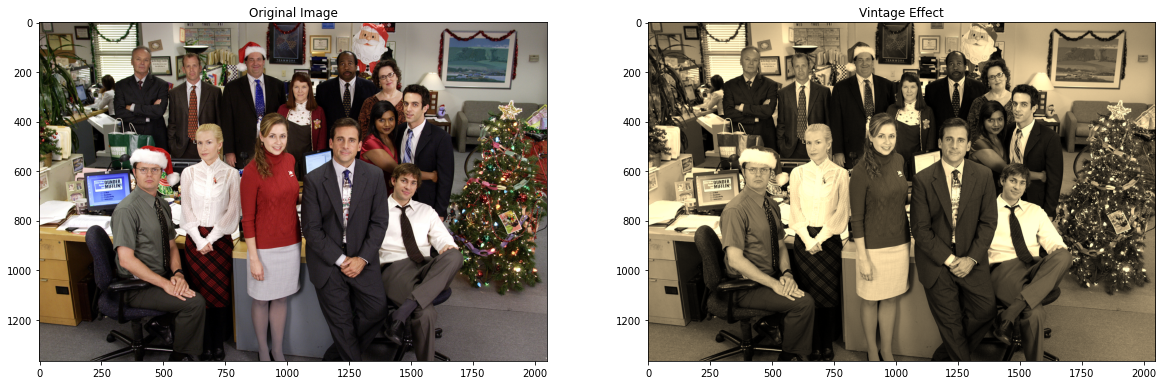

In [ ]:
out = np.zeros(img.shape,dtype='int')
out[:,:,2] = vinB.astype('int')
out[:,:,1] = vinG.astype('int')
out[:,:,0] = vinR.astype('int')
out = np.copy(out.astype('int'))
out[out>255] = 255

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgRGB)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out)
plt.title("Vintage Effect")

### **Matrix effect**

In [ ]:
img = cv2.imread("download.jpeg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
val = 255
imgB = img[:,:,0].astype('double')/val
imgG = img[:,:,1].astype('double')/val
imgR = img[:,:,2].astype('double')/val

imgR = (imgR**(1.5))
imgG = (imgG**(0.8))
imgB = (imgB**(1.5))

Text(0.5, 1.0, 'Matrix Effect')

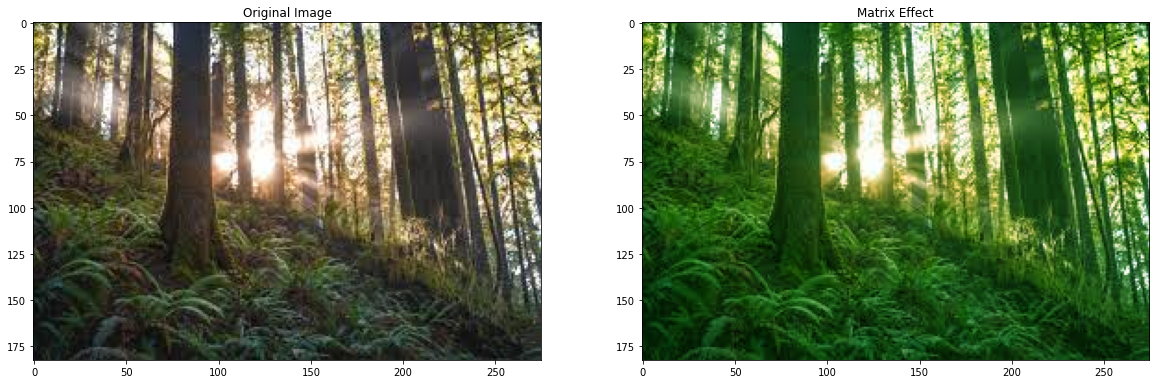

In [ ]:
# Scaling back
out = np.zeros(img.shape)
out[:,:,2] = imgB*val
out[:,:,1] = imgG*val
out[:,:,0] = imgR*val
out = np.copy(out.astype('uint8'))

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgRGB)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out)
plt.title("Matrix Effect")

### **Vignetting**

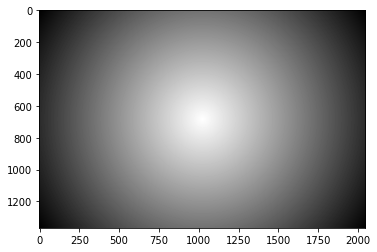

In [ ]:
img = cv2.imread("office.jpg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
val = 255
imgB = img[:,:,0].astype('double')/val
imgG = img[:,:,1].astype('double')/val
imgR = img[:,:,2].astype('double')/val

city = np.array(img)
r = city.shape[0]
c = city.shape[1]
middleR = r//2 
middleC = c//2
out = np.zeros((r,c))

for i in range(r):
    for j in range(c):
        out[i,j] = math.sqrt((i-middleR)**2 + (j-middleC)**2)

out = out / np.max(out);
out = 1 - out;
plt.imshow(out,cmap='gray')

Text(0.5, 1.0, 'Vignetting Effect')

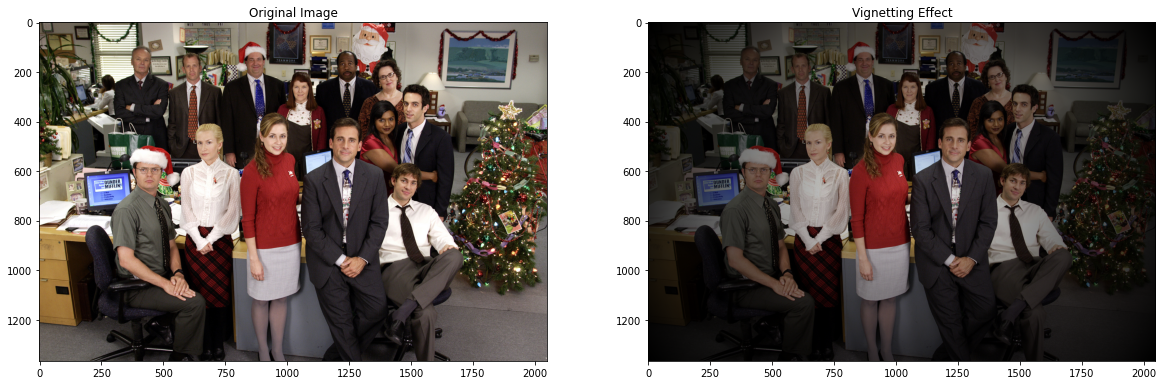

In [ ]:
out1 = np.copy(city)
out1 = city.astype('double')
out1[:,:,0] = out1[:,:,0]*out
out1[:,:,1] = out1[:,:,1]*out
out1[:,:,2] = out1[:,:,2]*out
out1 = out1.astype('uint8')
out1 = cv2.cvtColor(out1,cv2.COLOR_BGR2RGB)

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(imgRGB)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out1)
plt.title("Vignetting Effect")

### **Duotone**

In [ ]:
img = cv2.imread("office.jpg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Blue
outB = imgRGB.copy()
outB[:,:,0] = 0
outB[:,:,1] = 0
#Green
outG = imgRGB.copy()
outG[:,:,0] = 0
outG[:,:,2] = 0
#Red
outR = imgRGB.copy()
outR[:,:,1] = 0
outR[:,:,2] = 0

listIt = []
for i in range(256):
    val = i**1.105
    listIt.append(val)
listIt = np.array(listIt)
val = 255
listIt[listIt>val] = val
listIt = listIt.astype('uint8')

Text(0.5, 1.0, 'DuoTone Blue')

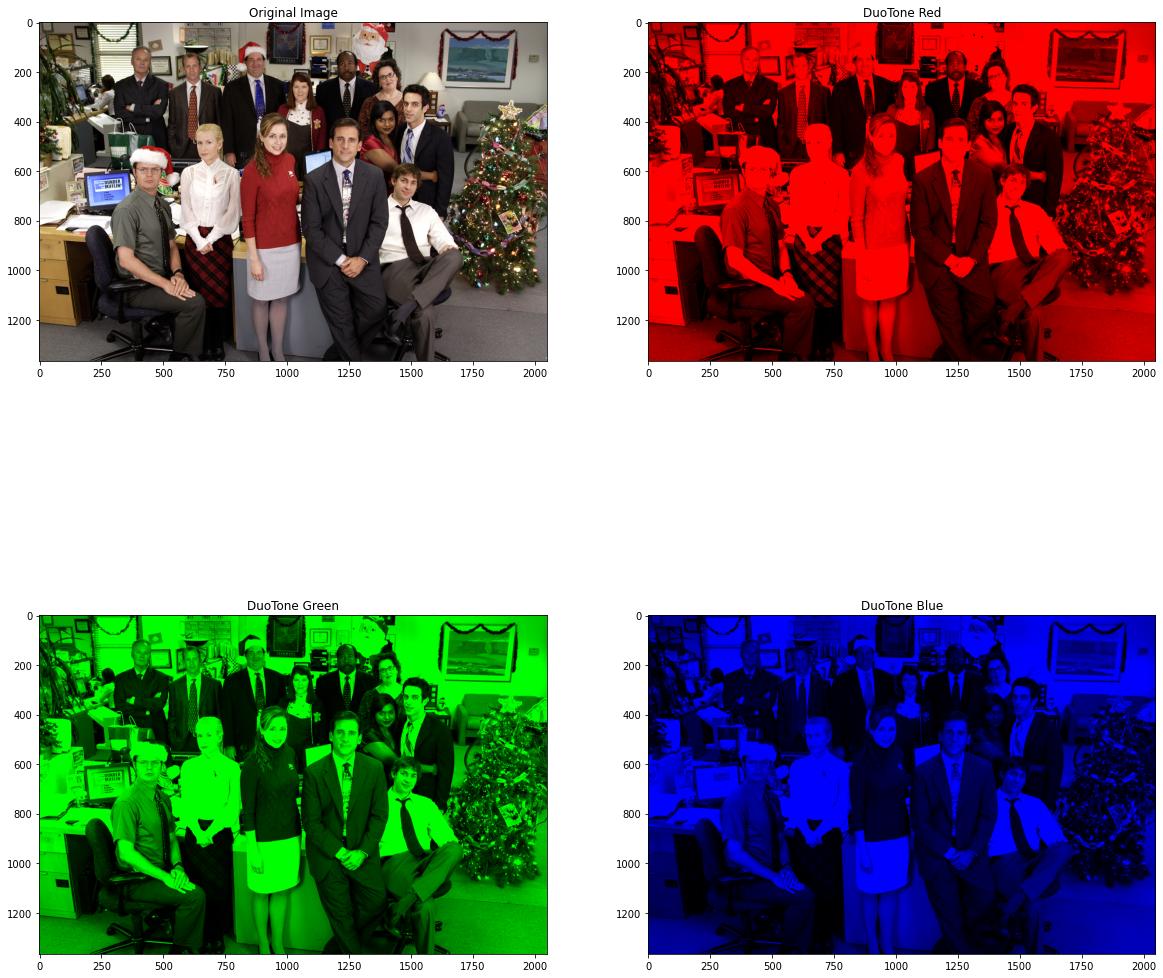

In [ ]:
vals = cv2.LUT(outB[:,:,2],listIt)
outB[:,:,2] = vals

vals = cv2.LUT(outG[:,:,1],listIt)
outG[:,:,1] = vals

vals = cv2.LUT(outR[:,:,0],listIt)
outR[:,:,0] = vals

# PLotting
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(imgRGB)
plt.title("Original Image")
plt.subplot(222)
plt.imshow(outR)
plt.title("DuoTone Red")
plt.subplot(223)
plt.imshow(outG)
plt.title("DuoTone Green")
plt.subplot(224)
plt.imshow(outB)
plt.title("DuoTone Blue")

# Question 4 - Realistic Systems

## 4.1 and 4.2

In [ ]:
def redefine(imgP, pad, img):
    r=imgP.shape[0]
    c=imgP.shape[1]
    x0 = pad
    x1 = r-pad
    y0 = pad
    y1 = c-pad
    imgP[x0:x1, y0:y1] = img
    return imgP

def padding(img,kernel_size):
    k=kernel_size
    pad = math.floor(k/2)
    h=img.shape[0]
    w=img.shape[1]
    imgP = np.zeros((h+(2*pad),w+(2*pad)))
    r=imgP.shape[0]
    c=imgP.shape[1]
    imgP[pad:r-pad, pad:c-pad] = img
    im = redefine(imgP,pad,img)
    return im

In [ ]:
# New coordinates after rotation are as follows:
# X' = Xcosθ - Ysinθ 
# Y' = Xsinθ + Ycosθ

def rotAngle(theta, h,w):
    # a = np.abs(np.cos(theta))
    # b = np.abs(np.sin(theta))
    h_r = int(h * np.abs(np.cos(theta)) + w * np.abs(np.sin(theta)))
    w_r = int(-h * np.abs(np.sin(theta)) + w * np.abs(np.cos(theta)))
    return h_r, w_r

def projection(theta, h ,w):
    r1 = int(h * np.abs(np.cos(theta)) + w * np.abs(np.sin(theta)))
    r2 = int(h * np.abs(np.sin(theta)) + w * np.abs(np.cos(theta)))
    return r1,r2

def imrotate(image,angle,retain):
    # Converting angle 
    th = 180
    theta = angle * np.pi/th
    h = image.shape[0]
    w = image.shape[1]
    if retain == True:
        r1,r2 = projection(theta, h ,w)
    else:
        r1 = h
        r2 = w
    output = np.zeros((r1,r2))
    for i in range(r1):
        for j in range(r2):
            x = i - r1 // 2
            y = j - r2 // 2
            x_new, y_new = rotAngle(theta, x, y)
            x_new = int(x_new) + h // 2
            y_new = int(y_new) + w // 2
            if x_new >= 0 and x_new < h and y_new >= 0 and y_new < w:
                output[i][j] = image[x_new][y_new]
    out = output.astype('int')
    return out

## 4.3

Text(0.5, 1.0, '145 deg')

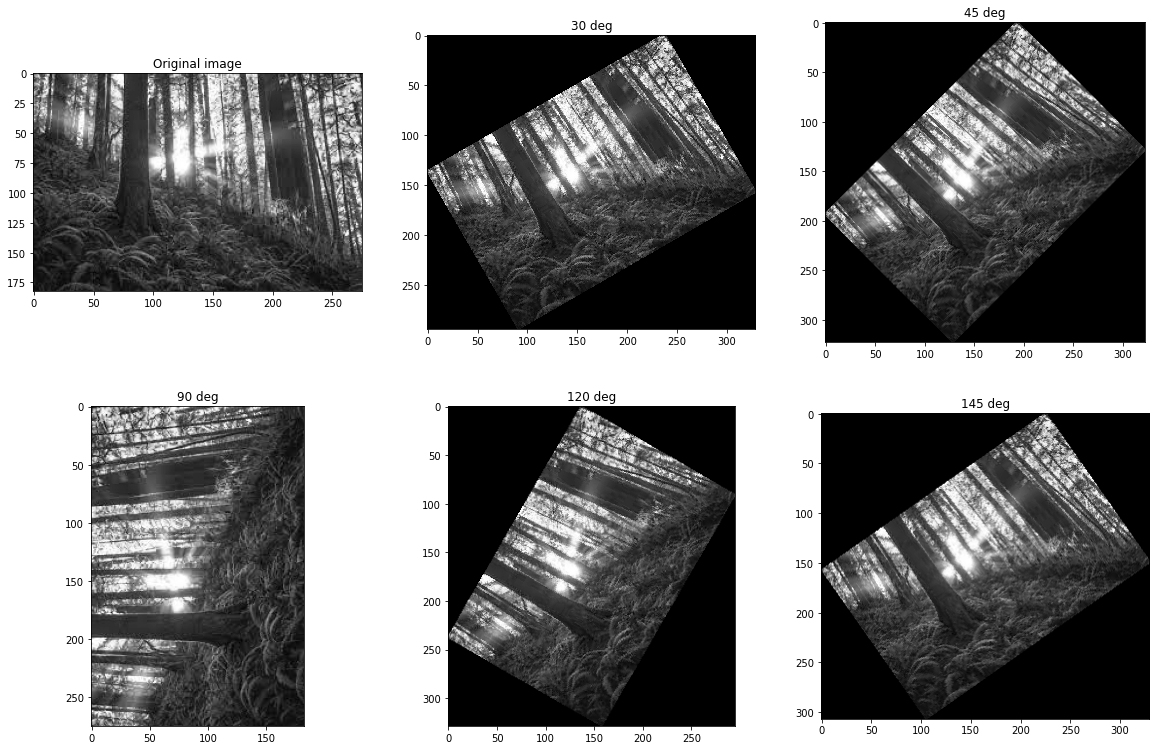

In [ ]:
img = cv2.imread("download.jpeg")
imm = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# PLotting - retainPixels = 1
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.imshow(imm,cmap='gray')
plt.title("Original image")
plt.subplot(332)
plt.imshow(imrotate(imm,30,1),cmap='gray')
plt.title("30 deg")
plt.subplot(333)
plt.imshow(imrotate(imm,45,1),cmap='gray')
plt.title('45 deg')
plt.subplot(334)
plt.imshow(imrotate(imm,90,1),cmap='gray')
plt.title("90 deg")
plt.subplot(335)
plt.imshow(imrotate(imm,120,1),cmap='gray')
plt.title('120 deg')
plt.subplot(336)
plt.imshow(imrotate(imm,145,1),cmap='gray')
plt.title("145 deg")

Text(0.5, 1.0, '145 deg')

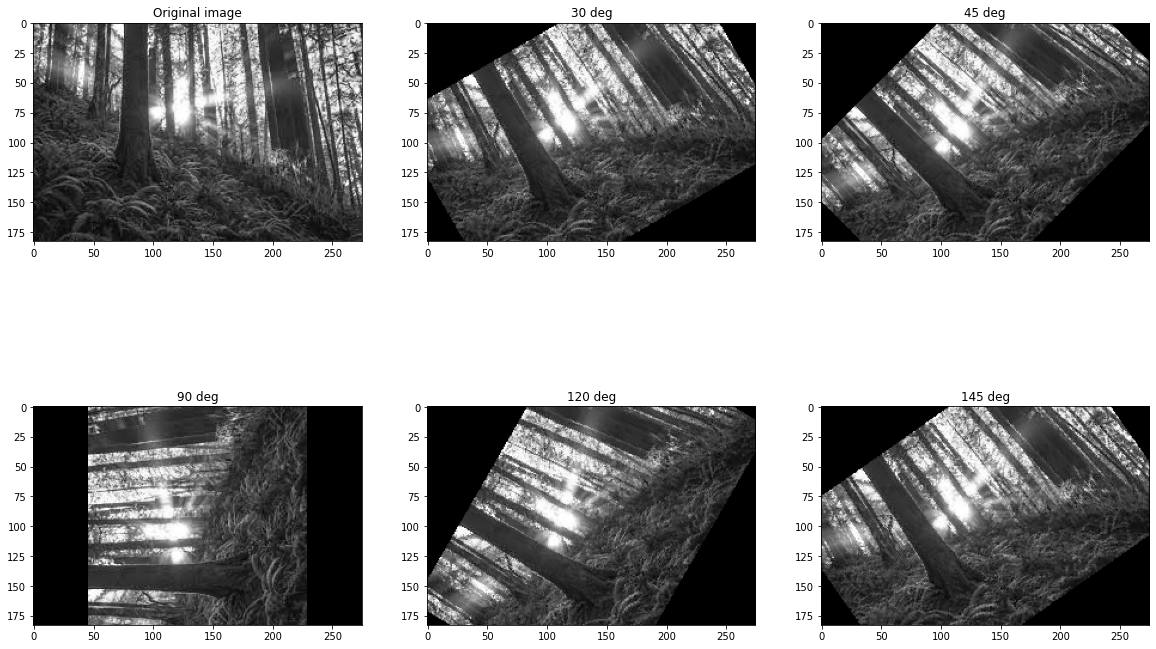

In [ ]:
# PLotting retainpixels = 0
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.imshow(imm,cmap='gray')
plt.title("Original image")
plt.subplot(332)
plt.imshow(imrotate(imm,30,0),cmap='gray')
plt.title("30 deg")
plt.subplot(333)
plt.imshow(imrotate(imm,45,0),cmap='gray')
plt.title('45 deg')
plt.subplot(334)
plt.imshow(imrotate(imm,90,0),cmap='gray')
plt.title("90 deg")
plt.subplot(335)
plt.imshow(imrotate(imm,120,0),cmap='gray')
plt.title('120 deg')
plt.subplot(336)
plt.imshow(imrotate(imm,145,0),cmap='gray')
plt.title("145 deg")

## 4.4

Text(0.5, 1.0, '-145 deg')

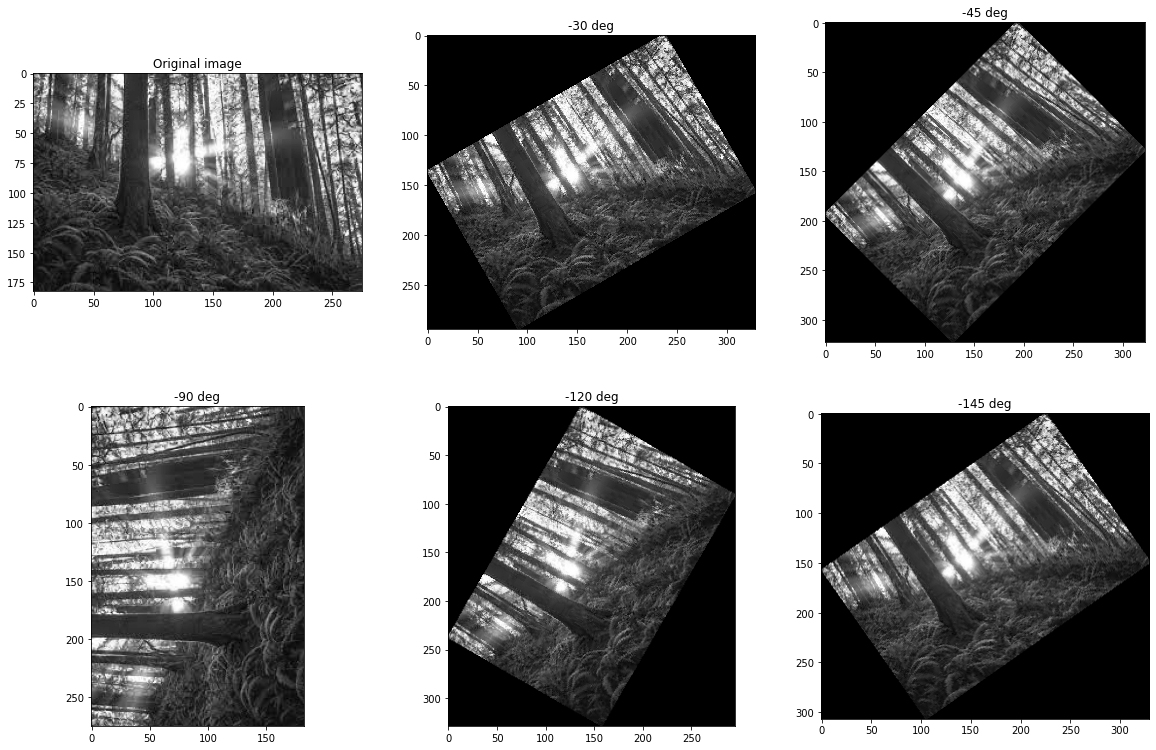

In [ ]:
img = cv2.imread("download.jpeg")
imm = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# PLotting - retainpixels = 1
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.imshow(imm,cmap='gray')
plt.title("Original image")
plt.subplot(332)
plt.imshow(imrotate(imm,-30, 1),cmap='gray')
plt.title("-30 deg")
plt.subplot(333)
plt.imshow(imrotate(imm,-45,1),cmap='gray')
plt.title('-45 deg')
plt.subplot(334)
plt.imshow(imrotate(imm,-90,1),cmap='gray')
plt.title("-90 deg")
plt.subplot(335)
plt.imshow(imrotate(imm,-120,1),cmap='gray')
plt.title('-120 deg')
plt.subplot(336)
plt.imshow(imrotate(imm,-145,1),cmap='gray')
plt.title("-145 deg")

Text(0.5, 1.0, '-145 deg')

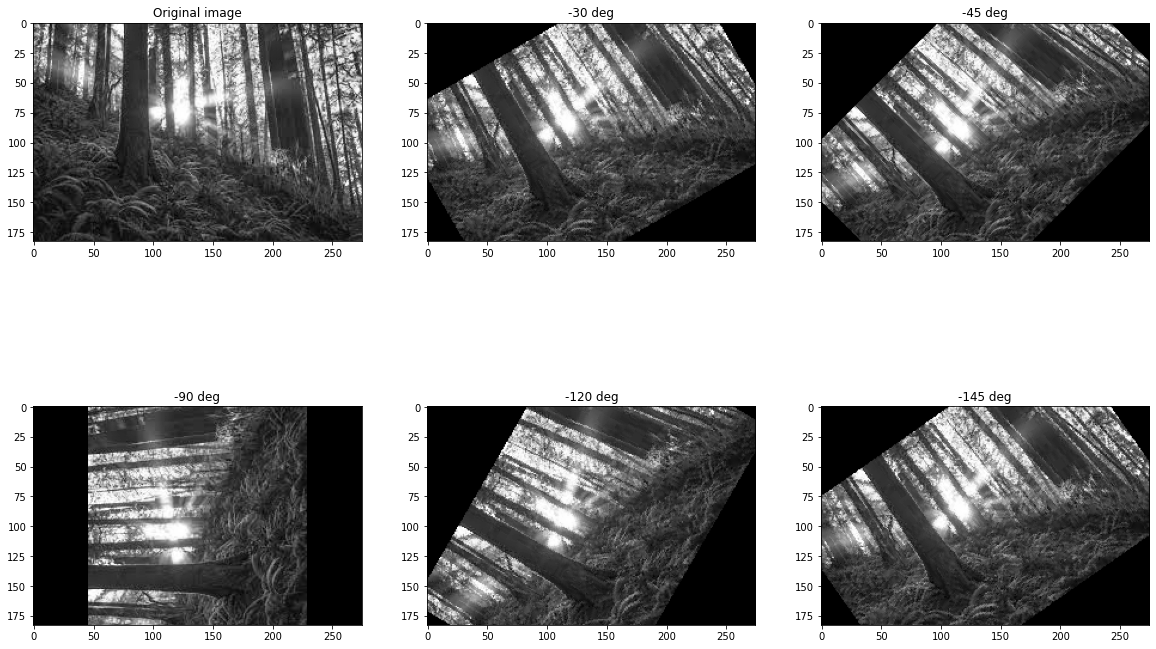

In [ ]:
# PLotting - retainpixels = 0
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.imshow(imm,cmap='gray')
plt.title("Original image")
plt.subplot(332)
plt.imshow(imrotate(imm,-30, 0),cmap='gray')
plt.title("-30 deg")
plt.subplot(333)
plt.imshow(imrotate(imm,-45,0),cmap='gray')
plt.title('-45 deg')
plt.subplot(334)
plt.imshow(imrotate(imm,-90,0),cmap='gray')
plt.title("-90 deg")
plt.subplot(335)
plt.imshow(imrotate(imm,-120,0),cmap='gray')
plt.title('-120 deg')
plt.subplot(336)
plt.imshow(imrotate(imm,-145,0),cmap='gray')
plt.title("-145 deg")

# Question 5 - More Morphology

## 5.1

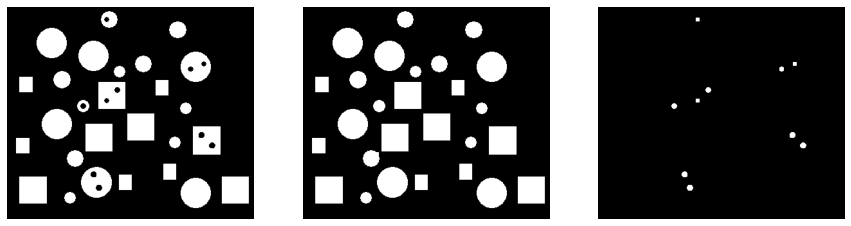

In [45]:
im = cv2.imread("shapes.png",0)
thres = 127
val = 255
binary = cv2.threshold(im, thres, val, cv2.THRESH_BINARY)[1]
binary = np.array(binary, np.uint8)
binary[binary > 0] = 1

kernel = np.ones((7,9))
solid_im = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) # mistake here

kernel = np.ones((3,3))
h = solid_im - binary
hole_im = cv2.morphologyEx(h, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.subplot(132)
plt.imshow(solid_im, cmap='gray')
plt.axis("off")
plt.subplot(133)
plt.imshow(hole_im, cmap='gray')
plt.axis("off")
plt.show()

### Find the number of objects having one or more hole(s). Plot the image containing only these objects.

In [100]:
hw = binary.shape # dimension of image 
visited = np.zeros(hw) # to keep track of visited pixels
output = np.zeros(hw, np.uint)
def dfs(x, y, im, out):
    temp = 0
    if visited[x][y] != 0:
        return 0
    if out[x][y] == 0:
        return 0
    visited[x][y] = 1
    output[x, y] = im
    i = 1
    if x != 0:
        temp += dfs(x - i, y, im, out)
    if x != hw[0] - 1:
        temp += dfs(x + i, y, im, out)
    if y != 0:
        temp += dfs(x, y - i, im, out)
    if y != hw[1] - 1:
        temp += dfs(x, y + i, im, out)
    return temp + 1

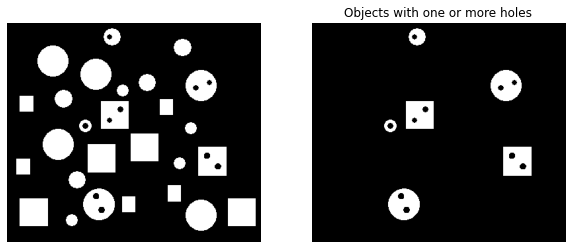

Number of objects with one or more holes: 6


In [101]:
num = 0
h = binary.shape[0]
w = binary.shape[1]
for i in range(h):
    for j in range(w):
        if hole_im[i][j] == 1:
            if visited[i][j] == 0:
                num += 1
            dfs(i, j, 1, solid_im)
            
newim_holes = np.logical_and(output, binary)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(newim_holes, cmap='gray')
plt.title("Objects with one or more holes")
plt.axis("off")
plt.show()
print("Number of objects with one or more holes:",str(num))

### Find the number of rectangular objects not containing any hole(s). Plot the image containing only these objects.

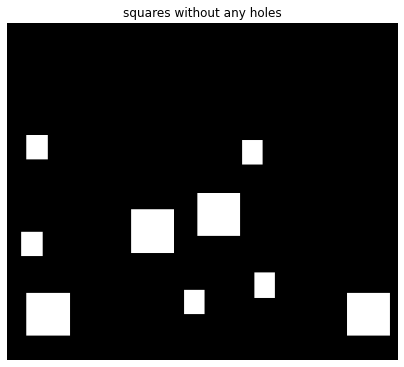

In [102]:
sq = np.array([[0,0,0],[1,1,0],[1,1,0]])  # square 
hw = binary.shape
visited = np.zeros(hw)
output = np.zeros(hw, np.uint)
def filter(im, fil):
    new = np.copy(im)
    h = im.shape[0]
    w = im.shape[1]
    im = np.pad(im, (1, 1), 'constant')
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            part = im[i - 1: i + 2, j - 1: j + 2]
            temp = 0
            for x in range(np.shape(part)[0]):
                for y in range(np.shape(part)[1]):
                    if part[x][y] != fil[x][y]:
                        temp = 1
            if temp == 0:
                new[i - 1, j - 1] = 1
            else:
                new[i - 1, j - 1] = 0
    return new

num = 0
h = binary.shape[0]
w = binary.shape[1]
obj = filter(binary, sq)
for i in range(h):
    for j in range(w):
        if obj[i][j] == 1:
            if visited[i][j] == 0:
                num += 1
            dfs(i, j, 1, binary)

squares = output
sq_holes = np.logical_and(newim_holes, squares)
sq_no_holes = squares - sq_holes

# Plotting
plt.figure(figsize=(7,7))
plt.imshow(sq_no_holes, cmap='gray')
plt.title("squares without any holes")
plt.axis("off")
plt.show()

### Find the number of circular objects in the image. Plot the image containing only these objects.

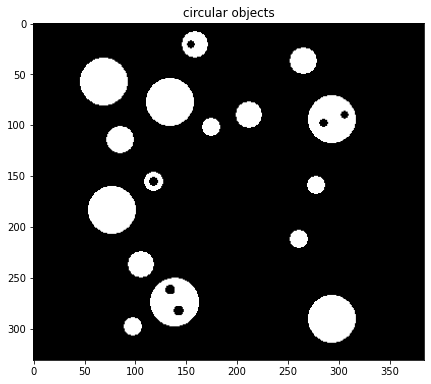

In [58]:
# num of cirlces = num of objects - number of squares 
circles = binary - squares 
plt.figure(figsize=(7,7))
plt.imshow(circles, cmap='gray')
plt.title("circular objects")
plt.show()

### Find the number of circular objects containing one or more hole(s). Plot the image containing only these objects.

Text(0.5, 1.0, 'circular objects with holes')

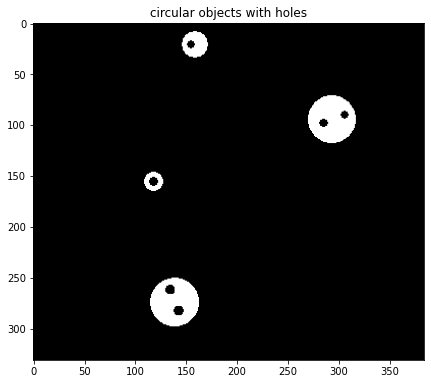

In [65]:
# circular objects containing one or more hole = number of cicles - number of circles without holes
c_holes = np.logical_and(newim_holes, circles)
plt.figure(figsize=(7,7))
plt.imshow(c_holes, cmap='gray')
plt.title("circular objects with holes")

## 5.2

In [114]:
img_circles = cv2.imread('circles.jpg', 0)
thres = 127
val = 255
im = cv2.threshold(img_circles, thres, val, cv2.THRESH_BINARY)[1]
im = np.array(im, np.uint8)
im[im > 0] = 1

def dfs(x, y, imm):
    t = 0
    i = 1
    if visited[x][y] != t:
        return t
    if im[x][y] == t:
        return t
    visited[x][y] = i
    newim[x, y] = imm
    if x != 0:
        t += dfs(x - i, y, imm)
    if x != hw[0] - i:
        t += dfs(x + i, y, imm)
    if y != 0:
        t += dfs(x, y - i, imm)
    if y != hw[1] - i:
        t += dfs(x, y + i, imm)
    return t + 1

# size of each coin:
hw =im.shape
h = hw[0]
w = hw[1]
visited = np.zeros(hw)
newim = np.zeros(hw, np.uint)
dfs(200, 11, 1)
unique, counts = np.unique(newim, return_counts=True)
d = dict(zip(unique, counts))
sz = int(round(d[1] / 100) * 100)

### only circles which are touching the boundary

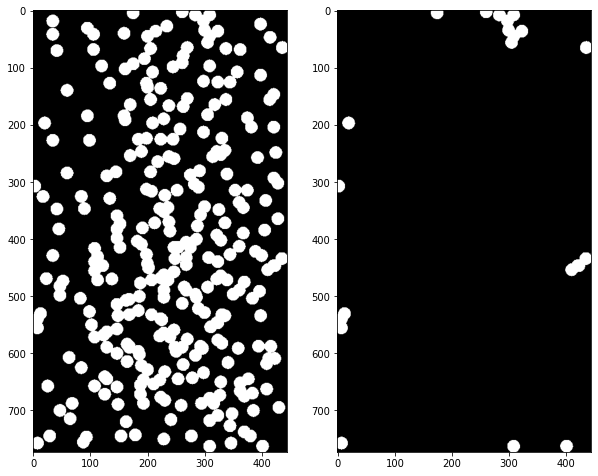

In [115]:
h = hw[0]
w = hw[1]
k = 1
for i in range(w):
    temp = dfs(0, i, k)
    temp = dfs(h - k, i, k)
for i in range(h):
    temp = dfs(i, 0, k)
    temp = dfs(i, w - k, k)

#PLotting
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(newim, cmap='gray')
plt.show()

### only overlapping circles.

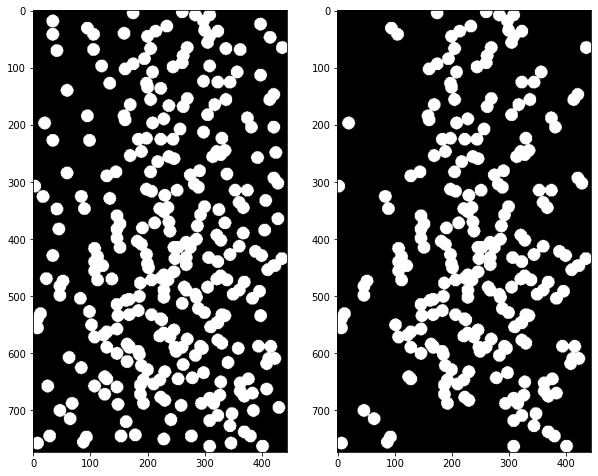

In [111]:
for i in range(h):
    for j in range(w):
        k = 1
        t = dfs(i, j, k+1)
        if t == 0:
            continue
        if t <= sz:
            indexes = np.where(newim == k+1)
            newim[indexes] = 0
        else:
            indexes = np.where(newim == k+1)
            newim[indexes] = k
            
#PLotting            
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(newim, cmap='gray')
plt.show()

### only non-overlapping circles.

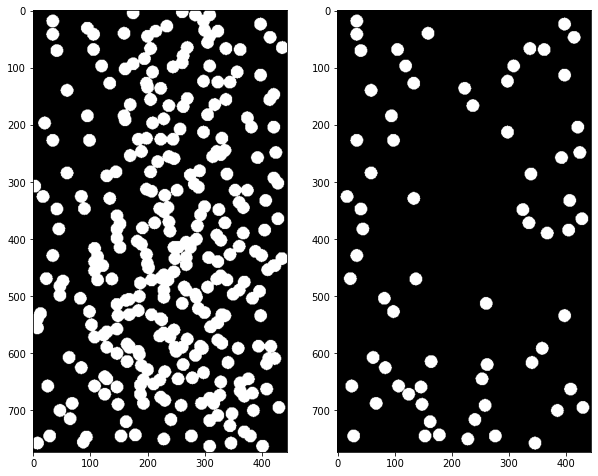

In [98]:
# non overlapping = total - overlapping
non_overlapping = im - newim

# Plotting            
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(non_overlapping, cmap='gray')
plt.show()